In [1]:
#XOR neural network 문제 예제

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility 일정한 데이터 값을 얻기 위한 랜덤 seed를 생성

print(tf.__version__)

2.5.0


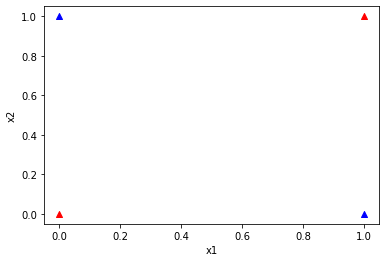

In [2]:
#x data 는 2차원 배열
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
#data 처리를 위한 모델 생성
#배치 사이즈는 한번에 학습시킬 size 즉, x의 size만큼 생성시킨다. 
#tf.data 데이터 처리할 때 쓰는 함수, 메모리의 데이터에서 dataset을 구성하려면 tf.data.Dataset.from_tensors() 또는 tf.data.Dataset.from_tensor_slices()을 사용할 수 있습니다.
#tf.data.Dataset.from_tensor_slices: 주어진 텐서를 각자의 요소로 나누는 것

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels): #함수 이름이 prepro--
    features = tf.cast(features, tf.float32) #텐서를 새로운 형태로 캐스팅하는데 사용한다. 정수형일경우, 소수점 버림
    labels = tf.cast(labels, tf.float32)     #불린형태면 true = 1, false = 0
    return features, labels

In [4]:
#전처리 된 데이터를 3개의 layer의 neural network를 통해 학습시킨 후 모델을 생성한다.
#tf.random.normal: 정규분포로부터 주어진 형태와 자료형을 갖는 난수 텐서를 반환시킨다.tf.random.normal(텐서형태, 평균, 표준편차)

W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [5]:
print(b1)


<tf.Variable 'bias1:0' shape=(1,) dtype=float32, numpy=array([-1.3080608], dtype=float32)>


In [6]:
#지능 생성
#먼저 linear function을 넣고(tf.matmul), logistic(tf.sigmoid) 함수를 넣는다.
#logistic regression을 합침으로써, neural net을 생성할 수 있다
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1) #행렬 합치는거 
    layer3 = tf.reshape(layer3, shape = [-1,2]) #배열의 모양 변경, shape에  -1이 포함되어있으면 숫자가 기입된 부분의 축을 변환하고 난 후에, 남은 축의 형태는 원래 텐서의 총 크기와 같도록 알아서 추정해준다.
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3) #linear regression 합친 것--> 가설
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

#0과 1을 산출하기 위한 정확도 값도 선언
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [7]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.8487
Iter: 5000, Loss: 0.6847
Iter: 10000, Loss: 0.6610
Iter: 15000, Loss: 0.6154
Iter: 20000, Loss: 0.5722
Iter: 25000, Loss: 0.5433
Iter: 30000, Loss: 0.5211
Iter: 35000, Loss: 0.4911
Iter: 40000, Loss: 0.4416
Iter: 45000, Loss: 0.3313
Testset Accuracy: 1.0000
